In [1]:
import numpy as np
import pylab as pb
import GPy 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def f(X):
    return 10. + .1*X + 2*np.sin(X)/X

fig,ax = pb.subplots()
ax.plot(np.linspace(-15,25),f(np.linspace(-10,20)),'r-')
ax.grid()

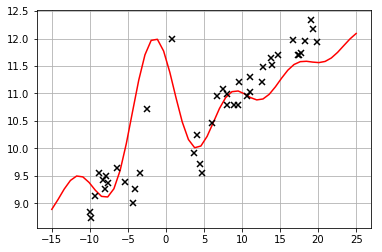

In [3]:
X = np.random.uniform(-10,20, 50)
X = X[~np.logical_and(X>-2,X<3)] #Remove points between -2 and 3 (just for illustration) 
X = np.hstack([np.random.uniform(-1,1,1),X]) #Prepend a point between -1 and 1  (just for illustration)
error = np.random.normal(0,.2,X.size)
Y = f(X) + error
fig,ax = pb.subplots()
ax.plot(np.linspace(-15,25),f(np.linspace(-10,20)),'r-')
ax.plot(X,Y,'kx',mew=1.5)
ax.grid()


In [5]:
kern = GPy.kern.MLP(1) + GPy.kern.Bias(1)

In [20]:
#Heteroscedastic model
m1 = GPy.models.GPHeteroscedasticRegression(X[:,None],Y[:,None],kern)
m1.het_Gauss.variance = abs(error)[:,None]
m1.het_Gauss.variance.fix()
m1.optimize()
X_new = np.array([[1], [2], [3]])
m1._raw_predict(X_new)

(array([[11.75153667],
        [10.87628375],
        [10.25501055]]), array([[0.14201692],
        [0.39150314],
        [0.18729371]]))

In [22]:
#Heteroscedastic model
m1 = GPy.models.GPHeteroscedasticRegression(X[:,None],Y[:,None],kern)
m1.het_Gauss.variance = 1
m1.het_Gauss.variance.fix()
m1.optimize()
X_new = np.array([[1], [2], [3],[20]])
m1._raw_predict(X_new)

 /Users/Chengyu/miniconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


(array([[10.17267852],
        [10.27103597],
        [10.36939335],
        [12.04142469]]), array([[0.02797955],
        [0.02607959],
        [0.02466504],
        [0.0748803 ]]))